In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Data Loading

In [2]:
app_DF= pd.read_csv("application_data.csv",encoding="ISO-8859-1")
col_DF= pd.read_csv("columns_description.csv",encoding="ISO-8859-1")
pre_DF= pd.read_csv("previous_application.csv",encoding="ISO-8859-1")

Data Shape

In [3]:
print("Application Data Size          : ",app_DF.shape)
print("Previous Application Data Size : ",pre_DF.shape)
print("Columns Description            : ",col_DF.shape)

Application Data Size          :  (307511, 122)
Previous Application Data Size :  (1670214, 37)
Columns Description            :  (160, 5)


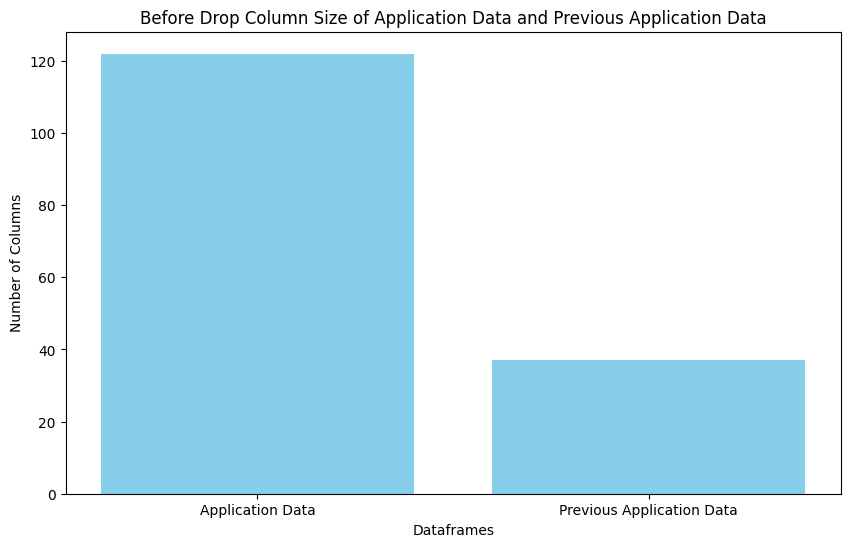

In [4]:
sizes = [app_DF.shape[1], pre_DF.shape[1]]
labels = ['Application Data', 'Previous Application Data']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color='skyblue')

# Adding labels and title
plt.xlabel('Dataframes')
plt.ylabel('Number of Columns')
plt.title('Before Drop Column Size of Application Data and Previous Application Data')

# Show plot
plt.show()

In [5]:
app_DF['TARGET'].value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

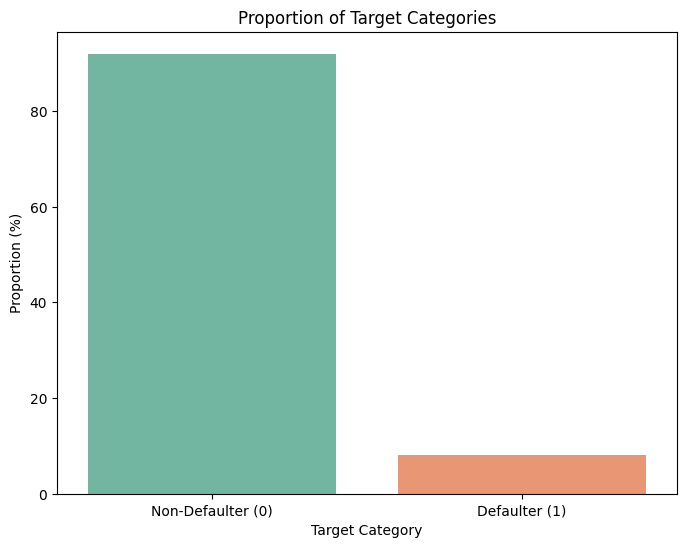

In [6]:
targetValue=app_DF['TARGET'].value_counts(normalize=True)*100
plt.figure(figsize=(8, 6))
sns.barplot(x=targetValue.index, y=targetValue.values, palette='Set2')
plt.title('Proportion of Target Categories')
plt.xlabel('Target Category')
plt.ylabel('Proportion (%)')
plt.xticks(ticks=range(len(targetValue)), labels=['Non-Defaulter (0)', 'Defaulter (1)'])
plt.show()

In [7]:
app_DF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
app_DF.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [9]:
for i in app_DF:
    if (app_DF[i].isnull().sum() / app_DF.shape[0]) * 100 > 40.00:
        app_DF.drop(columns=i, inplace=True)

In [10]:
print("Application Data Size          : ",app_DF.shape)
print("Previous Application Data Size : ",pre_DF.shape)
print("Columns Description            : ",col_DF.shape)

Application Data Size          :  (307511, 73)
Previous Application Data Size :  (1670214, 37)
Columns Description            :  (160, 5)


In [11]:
for i in pre_DF:
    if (pre_DF[i].isnull().sum() / pre_DF.shape[0]) * 100 > 40.00:
        pre_DF.drop(columns=i, inplace=True)

In [12]:
print("Application Data Size          : ",app_DF.shape)
print("Previous Application Data Size : ",pre_DF.shape)
print("Columns Description            : ",col_DF.shape)

Application Data Size          :  (307511, 73)
Previous Application Data Size :  (1670214, 26)
Columns Description            :  (160, 5)


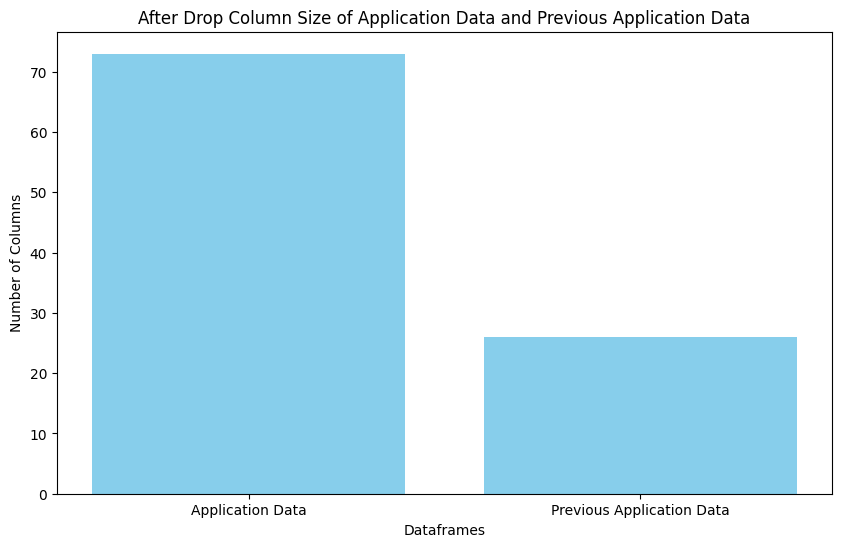

In [13]:
sizes = [app_DF.shape[1], pre_DF.shape[1]]
labels = ['Application Data', 'Previous Application Data']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color='skyblue')

# Adding labels and title
plt.xlabel('Dataframes')
plt.ylabel('Number of Columns')
plt.title('After Drop Column Size of Application Data and Previous Application Data')

# Show plot
plt.show()

In [14]:
merged_df = pd.merge(app_DF, pre_DF, on='SK_ID_CURR', how='left')

In [15]:
merged_df.shape

(1430155, 98)

In [16]:
app_DF['TARGET'].value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [17]:
for i in merged_df:
    if (merged_df[i].isnull().sum() / merged_df.shape[0]) * 100 > 40.00:
        merged_df.drop(columns=i, inplace=True)

In [18]:
merged_df.shape

(1430155, 98)

In [19]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest


In [20]:
merged_df["NAME_CONTRACT_TYPE_x"].value_counts()

NAME_CONTRACT_TYPE_x
Cash loans         1320679
Revolving loans     109476
Name: count, dtype: int64

In [21]:
merged_df["NAME_CONTRACT_TYPE_x"].isnull().sum()

0

In [22]:
merged_df["NAME_CONTRACT_TYPE_x"].dtype  

dtype('O')

In [23]:
merged_df.shape

(1430155, 98)

Initiating Data Exploration

In [24]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Data columns (total 98 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1430155 non-null  int64  
 1   TARGET                        1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1430155 non-null  object 
 3   CODE_GENDER                   1430155 non-null  object 
 4   FLAG_OWN_CAR                  1430155 non-null  object 
 5   FLAG_OWN_REALTY               1430155 non-null  object 
 6   CNT_CHILDREN                  1430155 non-null  int64  
 7   AMT_INCOME_TOTAL              1430155 non-null  float64
 8   AMT_CREDIT_x                  1430155 non-null  float64
 9   AMT_ANNUITY_x                 1430062 non-null  float64
 10  AMT_GOODS_PRICE_x             1428936 non-null  float64
 11  NAME_TYPE_SUITE               1426124 non-null  object 
 12  NAME_INCOME_TYPE            

In [26]:
merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430062e+06,1.428936e+06,1.430155e+06,1.430155e+06,1.430155e+06,...,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.106488e+06
mean,2.784702e+05,8.624240e-02,4.038870e-01,1.736036e+05,5.893386e+05,2.704203e+04,5.294435e+05,2.079102e-02,-1.631495e+04,6.860209e+04,...,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,2.264512e+05,1.247893e+01,9.964321e-01,-8.803670e+02,3.149878e+02,1.605194e+01
std,1.028021e+05,2.807218e-01,7.165176e-01,1.983303e+05,3.874204e+05,1.404002e+04,3.557882e+05,1.339810e-02,4.346737e+03,1.451967e+05,...,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,3.159376e+05,3.331474e+00,5.962560e-02,7.835402e+02,7.695082e+03,1.456675e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.522900e+04,-1.791200e+04,...,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.893610e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.679850e+04,2.385000e+05,1.003200e-02,-1.997500e+04,-2.825000e+03,...,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,4.982850e+04,1.000000e+01,1.000000e+00,-1.313000e+03,-1.000000e+00,6.000000e+00
50%,2.789560e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.491650e+04,4.500000e+05,1.885000e-02,-1.603700e+04,-1.277000e+03,...,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.102455e+05,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01
75%,3.675090e+05,0.000000e+00,1.000000e+00,2.115000e+05,8.086500e+05,3.457350e+04,6.795000e+05,2.866300e-02,-1.272950e+04,-2.820000e+02,...,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,2.295000e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01,2.400000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,7.250800e-02,-7.489000e+03,3.652430e+05,...,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


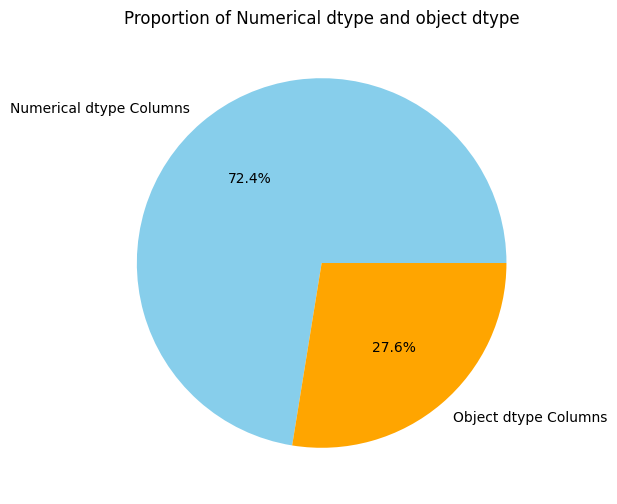

In [27]:
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

num_numerical_columns = len(numerical_columns)

num_objectDtype_columns = len(merged_df.columns) - num_numerical_columns


sizes = [num_numerical_columns, num_objectDtype_columns]
labels = ['Numerical dtype Columns', 'Object dtype Columns']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Proportion of Numerical dtype and object dtype')
plt.show()

In [28]:
for i in merged_df:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE_x
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START_x
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_

In [29]:
# filtered_df.shape

In [30]:
merged_df["DAYS_BIRTH"]

0          -9461
1         -16765
2         -16765
3         -16765
4         -19046
           ...  
1430150   -16856
1430151   -16856
1430152   -16856
1430153   -16856
1430154   -16856
Name: DAYS_BIRTH, Length: 1430155, dtype: int64

In [31]:
numeric_columns = merged_df.select_dtypes(include='number').columns
negative_columns = []
for column in numeric_columns:
    if (merged_df[column] < 0).any():
        negative_columns.append(column)

print("Columns with negative values:")
print(negative_columns)

merged_df[negative_columns] = merged_df[negative_columns].abs()

negative_columns_after_conversion = []
for column in negative_columns:
    if (merged_df[column] < 0).any():
        negative_columns_after_conversion.append(column)

Columns with negative values:
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_DECISION', 'SELLERPLACE_AREA']


In [32]:
merged_df["DAYS_BIRTH"]

0           9461
1          16765
2          16765
3          16765
4          19046
           ...  
1430150    16856
1430151    16856
1430152    16856
1430153    16856
1430154    16856
Name: DAYS_BIRTH, Length: 1430155, dtype: int64

In [33]:
merged_df["TARGET"].value_counts()

TARGET
0    1306815
1     123340
Name: count, dtype: int64

In [34]:
len(merged_df["TARGET"].value_counts())

2

In [35]:

categorical_columns = []

for column in merged_df.columns:

    unique_count = len(merged_df[column].value_counts())

    if (unique_count < 15) and (merged_df["NAME_CONTRACT_TYPE_x"].dtype  == 'O'):
        categorical_columns.append(column)


print("Categorical columns:")
print(categorical_columns)


Categorical columns:
['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG

In [36]:
merged_df["NAME_CONTRACT_TYPE_x"].value_counts()

NAME_CONTRACT_TYPE_x
Cash loans         1320679
Revolving loans     109476
Name: count, dtype: int64

In [37]:

for column in categorical_columns:

    category_names = merged_df[column].unique()
    mapping_dict = {category: i for i, category in enumerate(category_names)}
    merged_df[column+"Numerical"] = merged_df[column].map(mapping_dict)
    print(merged_df[column+"Numerical"])
    print("_______________________________________________________________________")


0          0
1          1
2          1
3          1
4          1
          ..
1430150    1
1430151    1
1430152    1
1430153    1
1430154    1
Name: TARGETNumerical, Length: 1430155, dtype: int64
_______________________________________________________________________
0          0
1          0
2          0
3          0
4          1
          ..
1430150    0
1430151    0
1430152    0
1430153    0
1430154    0
Name: NAME_CONTRACT_TYPE_xNumerical, Length: 1430155, dtype: int64
_______________________________________________________________________
0          0
1          1
2          1
3          1
4          0
          ..
1430150    1
1430151    1
1430152    1
1430153    1
1430154    1
Name: CODE_GENDERNumerical, Length: 1430155, dtype: int64
_______________________________________________________________________
0          0
1          0
2          0
3          0
4          1
          ..
1430150    0
1430151    0
1430152    0
1430153    0
1430154    0
Name: FLAG_OWN_CARNumerical, Lengt

In [38]:
merged_df["NAME_CONTRACT_TYPE_x"].value_counts()

NAME_CONTRACT_TYPE_x
Cash loans         1320679
Revolving loans     109476
Name: count, dtype: int64

In [39]:
merged_df["NAME_CONTRACT_TYPE_x"].value_counts()

NAME_CONTRACT_TYPE_x
Cash loans         1320679
Revolving loans     109476
Name: count, dtype: int64

In [40]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NFLAG_LAST_APPL_IN_DAYNumerical,NAME_CONTRACT_STATUSNumerical,NAME_PAYMENT_TYPENumerical,CODE_REJECT_REASONNumerical,NAME_CLIENT_TYPENumerical,NAME_PORTFOLIONumerical,NAME_PRODUCT_TYPENumerical,CHANNEL_TYPENumerical,NAME_SELLER_INDUSTRYNumerical,NAME_YIELD_GROUPNumerical
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,1,1,1,1,1,0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,1,0,2,0,0,0,2,1
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,1,0,2,0,0,2,3,1
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,1,0,0,0,0,3,4,1


In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 162 entries, SK_ID_CURR to NAME_YIELD_GROUPNumerical
dtypes: float64(30), int64(105), object(27)
memory usage: 1.7+ GB


In [42]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NFLAG_LAST_APPL_IN_DAYNumerical,NAME_CONTRACT_STATUSNumerical,NAME_PAYMENT_TYPENumerical,CODE_REJECT_REASONNumerical,NAME_CLIENT_TYPENumerical,NAME_PORTFOLIONumerical,NAME_PRODUCT_TYPENumerical,CHANNEL_TYPENumerical,NAME_SELLER_INDUSTRYNumerical,NAME_YIELD_GROUPNumerical
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,1,1,1,1,1,0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,1,0,2,0,0,0,2,1
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,1,0,2,0,0,2,3,1
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,1,0,0,0,0,3,4,1


In [43]:
# merged_df["NAME_CONTRACT_TYPE_x"].value_counts().idxmax()

In [44]:
# merged_df["NAME_CONTRACT_TYPE_x"].value_counts().index.tolist()

In [45]:
# numerical_columns = [
#     'AMT_INCOME_TOTAL',
#     'AMT_CREDIT_x',
#     'AMT_ANNUITY_x',
#     'AMT_GOODS_PRICE_x',
#     'REGION_POPULATION_RELATIVE',
#     'DAYS_BIRTH',
#     'DAYS_EMPLOYED',
#     'DAYS_REGISTRATION',
#     'DAYS_ID_PUBLISH',
#     'DAYS_LAST_PHONE_CHANGE',
#     'EXT_SOURCE_2',
#     'EXT_SOURCE_3',
#     'OBS_30_CNT_SOCIAL_CIRCLE',
#     'DEF_30_CNT_SOCIAL_CIRCLE',
#     'OBS_60_CNT_SOCIAL_CIRCLE',
#     'DEF_60_CNT_SOCIAL_CIRCLE',
#     'AMT_REQ_CREDIT_BUREAU_HOUR',
#     'AMT_REQ_CREDIT_BUREAU_DAY',
#     'AMT_REQ_CREDIT_BUREAU_WEEK',
#     'AMT_REQ_CREDIT_BUREAU_MON',
#     'AMT_REQ_CREDIT_BUREAU_QRT',
#     'AMT_REQ_CREDIT_BUREAU_YEAR'
# ]


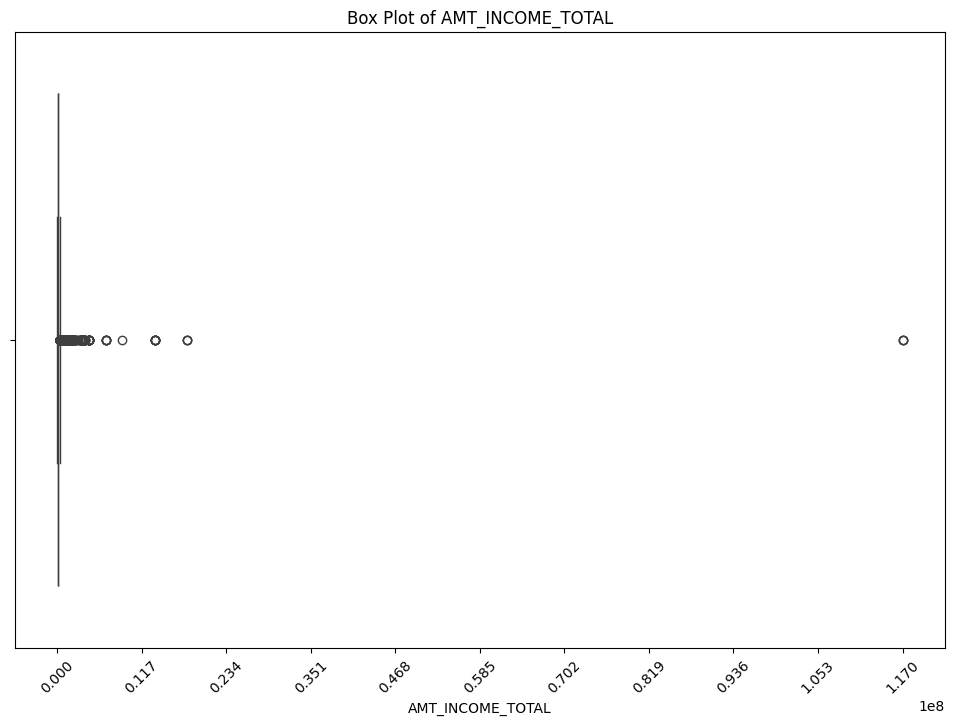

In [46]:
min_value = merged_df["AMT_INCOME_TOTAL"].min()
max_value = merged_df["AMT_INCOME_TOTAL"].max()


num_bins = 10

bin_width = (max_value - min_value) / num_bins

bin_edges = [min_value + i * bin_width for i in range(num_bins + 1)]

plt.figure(figsize=(12, 8))
sns.boxplot(x=merged_df["AMT_INCOME_TOTAL"])

plt.xticks(bin_edges, rotation=45)


plt.title('Box Plot of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

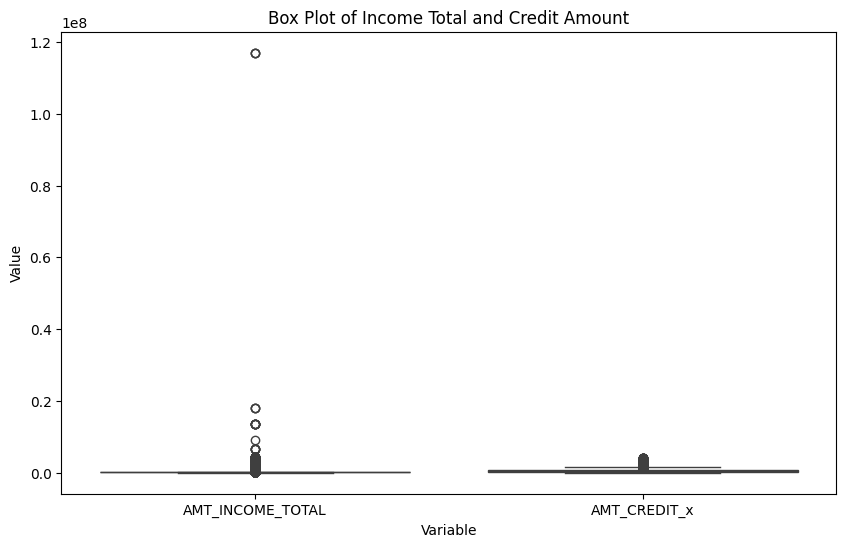

In [47]:
x_variable = "AMT_INCOME_TOTAL"
y_variable = "AMT_CREDIT_x"

# Create box plots for each variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[[x_variable, y_variable]])

# Set plot title and labels
plt.title('Box Plot of Income Total and Credit Amount')
plt.xlabel('Variable')
plt.ylabel('Value')

# Show plot
plt.show()

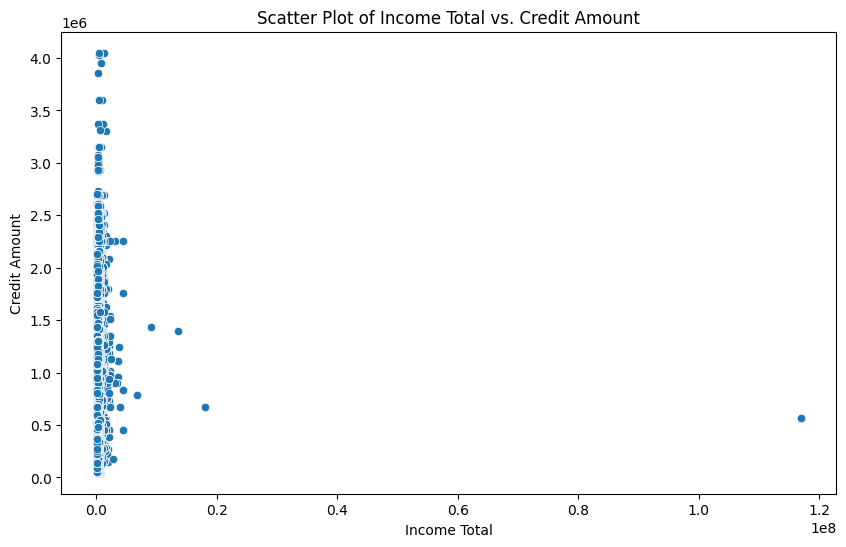

In [48]:
x_variable = "AMT_INCOME_TOTAL"
y_variable = "AMT_CREDIT_x"

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df[x_variable], y=merged_df[y_variable])

# Set plot title and labels
plt.title('Scatter Plot of Income Total vs. Credit Amount')
plt.xlabel('Income Total')
plt.ylabel('Credit Amount')

# Show plot
plt.show()

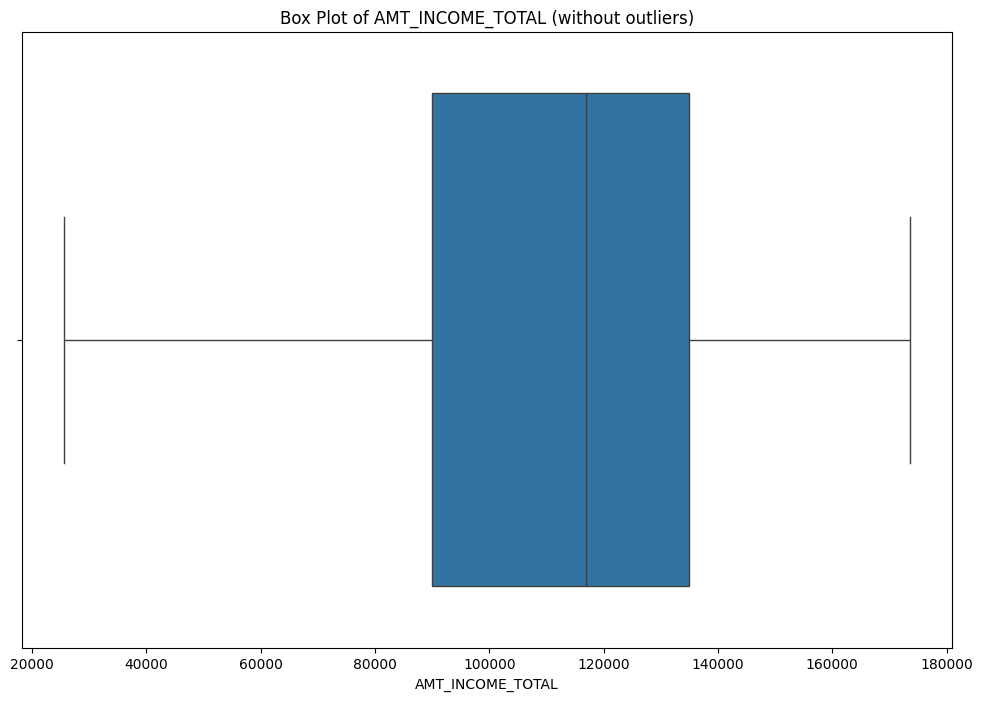

In [49]:
# Filter the dataframe to remove outliers
filtered_df = merged_df[(merged_df['AMT_INCOME_TOTAL'] >= 25650.0) & (merged_df['AMT_INCOME_TOTAL'] <= 173603.62258759016)]

# Create a box plot for the filtered data
plt.figure(figsize=(12, 8))
sns.boxplot(x=filtered_df["AMT_INCOME_TOTAL"])
plt.title('Box Plot of AMT_INCOME_TOTAL (without outliers)')
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()


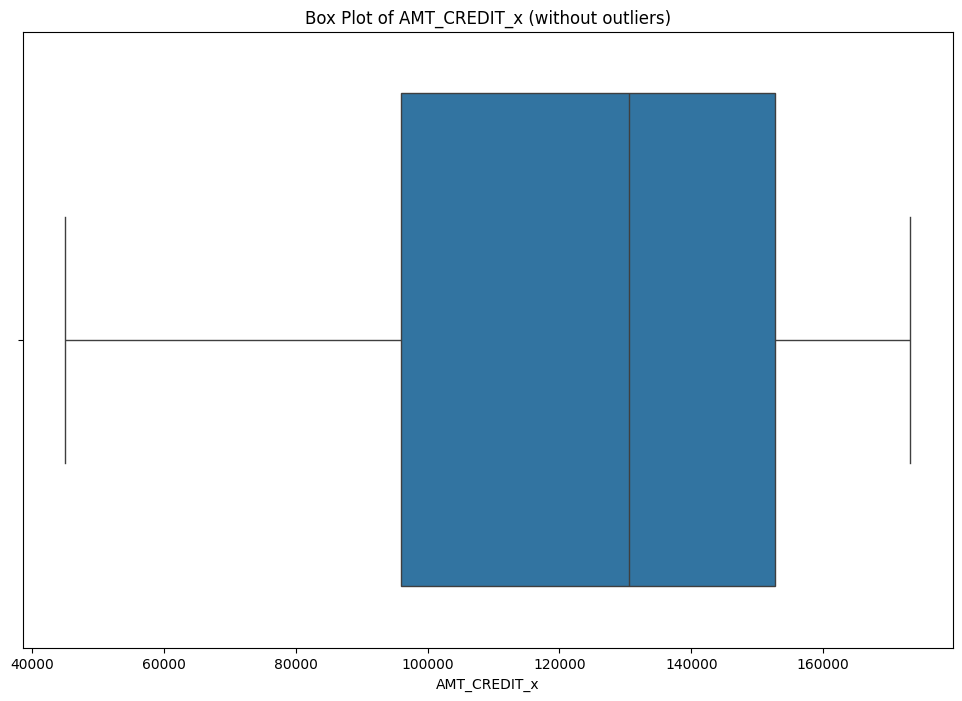

In [50]:
# Filter the dataframe to remove outliers in the "AMT_CREDIT_x" column
filtered_credit_df = filtered_df[(merged_df['AMT_CREDIT_x'] >= merged_df["AMT_CREDIT_x"].min()) & (merged_df['AMT_CREDIT_x'] <= 173603.62258759016)]

# Create a box plot for the filtered data
plt.figure(figsize=(12, 8))
sns.boxplot(x=filtered_credit_df["AMT_CREDIT_x"])
plt.title('Box Plot of AMT_CREDIT_x (without outliers)')
plt.xlabel('AMT_CREDIT_x')
plt.show()


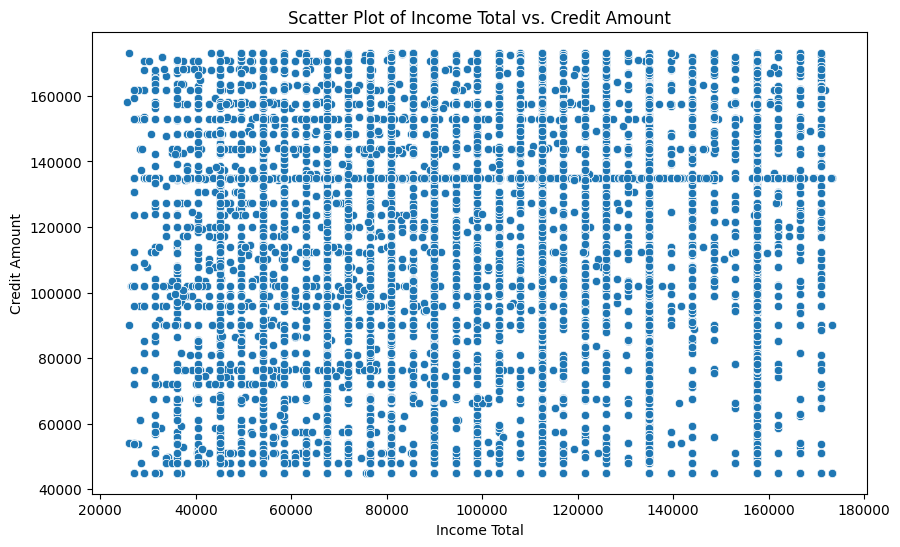

In [51]:
x_variable = "AMT_INCOME_TOTAL"
y_variable = "AMT_CREDIT_x"

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_credit_df[x_variable], y=filtered_credit_df[y_variable])

# Set plot title and labels
plt.title('Scatter Plot of Income Total vs. Credit Amount')
plt.xlabel('Income Total')
plt.ylabel('Credit Amount')

# Show plot
plt.show()

In [52]:
filtered_credit_df.shape

(100033, 162)

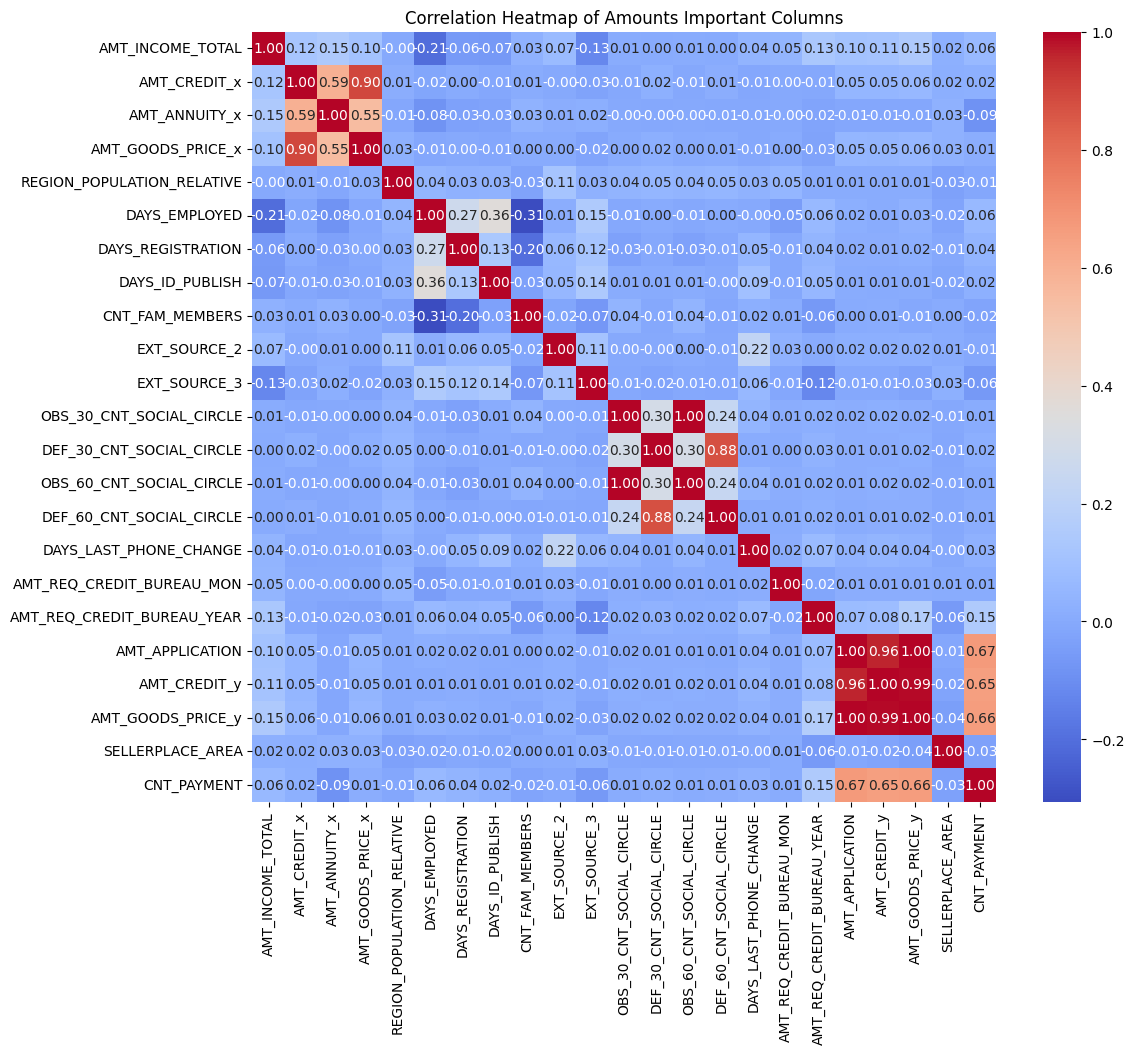

In [53]:
# Select numerical columns
numerical_columns = filtered_credit_df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_columns.corr()

# Select important columns
important_columns = ["AMT_INCOME_TOTAL", "AMT_CREDIT_x", "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x", "REGION_POPULATION_RELATIVE", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS", "EXT_SOURCE_2", "EXT_SOURCE_3", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_APPLICATION", "AMT_CREDIT_y", "AMT_GOODS_PRICE_y", "SELLERPLACE_AREA", "CNT_PAYMENT"]

# Filter the correlation matrix based on important columns
corr_matrix_filtered = corr_matrix.loc[important_columns, important_columns]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Amounts Important Columns')
plt.show()


In [56]:
filtered_sk_ids = filtered_credit_df['SK_ID_CURR'].unique()
app_DF.loc[app_DF['SK_ID_CURR'].isin(filtered_sk_ids), 'TARGET'] = 1

In [57]:
app_DF['TARGET'].value_counts(normalize=True)*100

TARGET
0    85.345565
1    14.654435
Name: proportion, dtype: float64

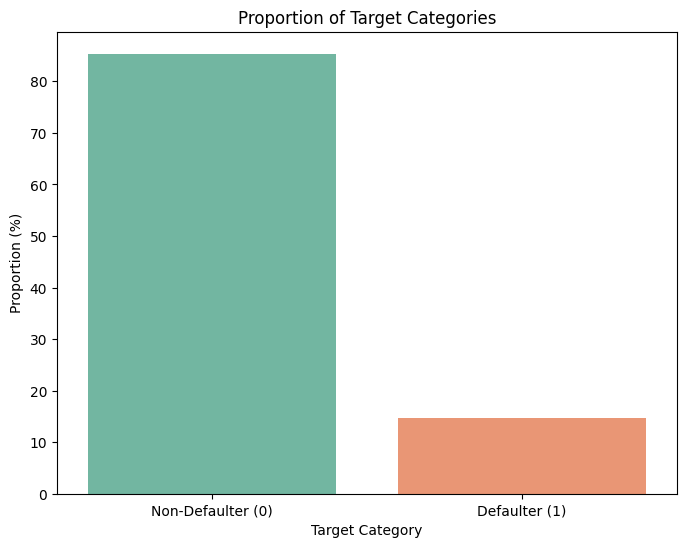

In [58]:
targetValue=app_DF['TARGET'].value_counts(normalize=True)*100
plt.figure(figsize=(8, 6))
sns.barplot(x=targetValue.index, y=targetValue.values, palette='Set2')
plt.title('Proportion of Target Categories')
plt.xlabel('Target Category')
plt.ylabel('Proportion (%)')
plt.xticks(ticks=range(len(targetValue)), labels=['Non-Defaulter (0)', 'Defaulter (1)'])
plt.show()